# 변수 형식 처리 및 파생변수 생성

### 주요 내용

1. 변수 수정, 추가 및 제거
2. 형식 변환 및 파생변수 생성
<br>

### 목표 
1. 분석 목적에 맞게 변수를 수정하고 파생 변수를 추가할 수 있다.
2. 날짜 등 변수 형식을 활용할 수 있다.

<br>
<hr>
<br>


## 1. 변수(열)의 수정, 추가, 제거

**pandas**의 기본 기능과 메서드를 활용하여 변수를 추가 하거나 수정, 업데이트하거나 제거 가능  
변수를 선택하듯 **=**을 활용해서 변수를 추가하거나 업데이트 가능

### 1.1. 변수 수정 및 추가

In [ ]:
# 라이브러리 불러오기
import pandas as pd


# 예제 만들기 : 딕셔너리를 활용한 DataFrame 생성
df_own = pd.DataFrame({'FIRST' : ['A', 'B', 'C', 'D'],
                       'SECOND': [7,6,5,8], 
                       'THIRD' : pd.date_range('2023-01-01', periods=4, freq='W-SAT')})
df_own

In [ ]:
# 변수 형식 확인
df_own.dtypes

In [ ]:
# 변수이름을 활용한 변수선택
df_own['SECOND']

In [ ]:
# =을 활용한 추가
df_own['FOURTH'] = 0
df_own

In [ ]:
import numpy as np

# =을 활용한 업데이트
df_own['FOURTH'] = np.sqrt(df_own['SECOND'])
df_own

In [ ]:
# .assign()도 활용 가능
df_own.assign(FOURTH = df_own['SECOND'] + 1)

<br>

pandas의 *dt.weekday*를 활용하여 날짜시간 변수에서 날짜 요소를 추출
 * 참고: [dt.weekday](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.weekday.html)

In [ ]:
# pandas의 dt.weekday 활용
    ## ['THIRD'] 대신 .THIRD 활용가능
df_own['THIRD'].dt.weekday

In [ ]:
df_own['WEEKDAY'] = df_own['THIRD'].dt.weekday
df_own

<br>

### 1.2.  변수 제거

*drop()*은 **index**와 **columns**를 활용하여 관측치와 변수를 제거  
`axis=`옵션에 따라 `axis=0`이면 관측치를 제거하거 `axis=1`이면 변수를 제거  

`columns=`이라는 옵션을 명시해서 변수를 제거하는 것이 가장 명확하고 실수를 줄일 수 있음

In [ ]:
# drop()을 활용한 관측치/변수 제거
df_own.drop('FOURTH', axis=1)
    # axis = 0 : 관측치
    # axis = 1 : 변수

In [ ]:
# drop()을 활용한 관측치/변수 제거(columns 활용)
df_own.drop(columns=['FOURTH'])

In [ ]:
# drop( ) 실행 후 원본 데이터는 변함이 없음
df_own

In [ ]:
# 원본 데이터의 업데이트
df_own = df_own.drop(columns=['FOURTH'])
df_own

In [ ]:
# 리스트를 활용한 복수 인덱스 제거
df_own = df_own.drop([0,3], axis=0)
df_own

<br>

### 1.3. 변수 이름 변경

변수이름을 바꾸고 싶을 때는 **DataFrame**의 메서드 *rename()*을 활용  
이때 `columns=` 옵션을 활용하고 딕셔너리 형식으로 기존변수이름과 새변수이름을 콜론으로 연결

In [ ]:
# rename() 활용 변수 이름 바꾸기 
df_own.rename(columns = {'FIRST':'var1', 'SECOND':'var2'})

<br>

#### [실습] df_sp를 활용

1. 'math score', 'reading score', 'writing score'를 합한 변수 'sum'을 **df_sp**에 추가
2. 'math score', 'reading score', 'writing score' 중 한과목이라도 40보다 작은지 확인하고 변수 'fail_yn' 추가
3. 2.의 'fail_yn'을 활용해서 세 점수 중 하나라도 40점 미만인 학생 선택
4. 변수 'sum'의 이름을 'total'로 변경
5. 변수 'fail_yn'을 **df_sp**에서 제거하고 원본 데이터 업데이트 

In [ ]:
df_sp = pd.read_csv('data/StudentsPerformance.csv')
df_sp.head()

In [ ]:
df_sp['sum'] = df_sp['math score'] + df_sp['reading score'] + df_sp['writing score']
df_sp

In [ ]:
# 2. 참고
cond_fail = (df_sp['math score']<40) | (df_sp['reading score']<40) | (df_sp['writing score']<40)
cond_fail

In [ ]:
df_sp['fail_yn'] = cond_fail
df_sp

In [ ]:
df_sp[df_sp['fail_yn']]

In [ ]:
df_sp.rename(columns={'sum': 'total'})

In [ ]:
df_sp = df_sp.drop('fail_yn', axis=1)
df_sp

In [ ]:
df_sp['fail_yn2'] = df_sp['fail_yn']

In [ ]:
df_sp.head(10)

In [ ]:
df_sp.loc[df_sp['fail_yn']==False, 'fail_yn2'] = '합격'

In [ ]:
df_sp['fail_yn3'] = df_sp['fail_yn'].apply(lambda x: 'np' if x else 'p')

#### 참고
한번에 비교 연산을 하거나 DataFrame의 sum()을 활용 가능

In [ ]:
df_sp.select_dtypes('number') <= 40

In [ ]:
# 하나라도 True인 것 찾기
(df_sp.select_dtypes('number') <= 40).any(axis=1)

In [ ]:
# 변수별로 40점 미만 학생수 계산하기
(df_sp.select_dtypes('number') <= 40).sum(axis=0)

In [ ]:
# 관측치별로 40점 미만 과목수 계산하기
(df_sp.select_dtypes('number') <= 40).sum(axis=1)

In [ ]:
(df_sp.select_dtypes('number') <= 40).sum(axis=1).value_counts()

<br>
<hr>
<br>

## 2. 변수 형식 변환 및 파생변수 생성

분석과정에서 변수의 형식을 바꾸거나 기존 변수를 활용한 파생변수 생성 가능  



### 2.1. 변수 형식의 확인/변환
**DataFrame**에서는 아래와 같은 형식의 Seires를 활용  


+ float: 실수(소수점을 포함한 숫자)
+ int: 정수(integer)
+ datetime: 날짜시간
+ bool: 불/불린(True 혹은 False)
+ category: 범주형
+ object: 문자형(string) 혹은 그 외

*.dtypes*를 활용하여 변수 형식을 확인  
*.astype()*을 활용해서 변수 형식을 변환 



In [ ]:
# 데이터 불러오기
df_ins = pd.read_csv('data/insurance.csv')
df_ins.head()

In [ ]:
# 변수 형식 확인
df_ins.dtypes

In [ ]:
# children을 float으로 변환
df_ins['children'].astype('float')

In [ ]:
# 기존 변수의 형식 업데이트
df_ins['children'] = df_ins['children'].astype('float')
df_ins.head()

In [ ]:
# 복수 변수의 형식 일괄 업데이트
category_vars = ['sex', 'smoker', 'region']
df_ins[category_vars] = df_ins[category_vars].astype('category')
df_ins

In [ ]:
# select_dtypes()의 활용
df_ins.select_dtypes('category')

<br>

#### [실습] df_pr의 활용

1. Pulse2(뛴 후)와 Pulse1(뛰기 전)의 차이를 계산하고 'Diff'로 변수 추가하기
2. .dtypes로 형식 확인하고 .nunique()로 중복값 제거한 값 개수 확인하기
3. 범주형 형식이 적당한 변수 목록 만들기
4. 3.의 변수들을 astype()으로 category 형식으로 변환하고 업데이트 하기
5. Ran, Smokes, Alcohol별 1.의 Diff의 평균 계산하기

In [ ]:
df_pr = pd.read_csv('data/PulseRates.csv')
df_pr.head()

In [ ]:
df_pr['Diff'] = df_pr['Pulse2'] - df_pr['Pulse1']
df_pr

In [ ]:
#df_pr.dtypes
df_pr.nunique()

In [ ]:
category_vars = ['Gender', 'Smokes', 'Alcohol', 'Exercise', 'Ran']
df_pr[category_vars] = df_pr[category_vars].astype('category')
df_pr.dtypes

In [ ]:
df_pr.groupby(['Ran', 'Smokes', 'Alcohol'], as_index=False)['Diff'].mean()

<br>

### 2.2. 수치형 변수의 구간화

수치형 변수는 *cut()* 이나 *qcut()* 으로 구간화 가능  


+ *cut()*: 등간격 혹은 주어진 구간 경계로 구간화
+ *qcut()*: 등비율로 구간화

<br>

*cut()*을 활용해서 등간격으로 구간화할 수 있고, `bins=` 옵션에 적절한 구간값을 직접 넣을 수도 있습니다. 

In [59]:
# 등간격으로 구간화하기
pd.cut(df_ins['charges'], bins=10)

0        (13651.585, 19916.44]
1         (1059.225, 7386.729]
2         (1059.225, 7386.729]
3        (19916.44, 26181.296]
4         (1059.225, 7386.729]
                 ...          
1333     (7386.729, 13651.585]
1334      (1059.225, 7386.729]
1335      (1059.225, 7386.729]
1336      (1059.225, 7386.729]
1337    (26181.296, 32446.151]
Name: charges, Length: 1338, dtype: category
Categories (10, interval[float64, right]): [(1059.225, 7386.729] < (7386.729, 13651.585] < (13651.585, 19916.44] < (19916.44, 26181.296] ... (38711.006, 44975.862] < (44975.862, 51240.717] < (51240.717, 57505.573] < (57505.573, 63770.428]]

In [60]:
charges_breaks = [0, 5000, 10000, 20000, 99999999999999]

In [61]:
pd.cut(df_ins['charges'], bins=charges_breaks, right=False, labels=['4','3','2','1'])

0       2
1       4
2       4
3       1
4       4
       ..
1333    2
1334    4
1335    4
1336    4
1337    1
Name: charges, Length: 1338, dtype: category
Categories (4, object): ['4' < '3' < '2' < '1']

In [62]:
# cut()을 활용한 10등급화
df_ins['charges_grp'] = pd.cut(df_ins['charges'], bins=10, labels=range(10))
df_ins

,age,sex,bmi,children,smoker,region,charges,charges_grp
0,19,female,27.900,0.0,yes,southwest,16884.92400,2
1,18,male,33.770,1.0,no,southeast,1725.55230,0
2,28,male,33.000,3.0,no,southeast,4449.46200,0
3,33,male,22.705,0.0,no,northwest,21984.47061,3
4,32,male,28.880,0.0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3.0,no,northwest,10600.54830,1
1334,18,female,31.920,0.0,no,northeast,2205.98080,0
1335,18,female,36.850,0.0,no,southeast,1629.83350,0
1336,21,female,25.800,0.0,no,southwest,2007.94500,0


In [63]:
# 등구간의 관측치 불균형 문제
df_ins['charges_grp'].value_counts()

0    536
1    398
2    129
3     86
5     59
6     57
4     35
7     32
9      4
8      2
Name: charges_grp, dtype: int64

In [64]:
# qcut()을 활용한 등비율 구간화
df_ins['charges_grp2'] = pd.qcut(df_ins['charges'], q=10, labels=range(1,11))
df_ins

,age,sex,bmi,children,smoker,region,charges,charges_grp,charges_grp2
0,19,female,27.900,0.0,yes,southwest,16884.92400,2,8
1,18,male,33.770,1.0,no,southeast,1725.55230,0,1
2,28,male,33.000,3.0,no,southeast,4449.46200,0,3
3,33,male,22.705,0.0,no,northwest,21984.47061,3,9
4,32,male,28.880,0.0,no,northwest,3866.85520,0,2
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3.0,no,northwest,10600.54830,1,6
1334,18,female,31.920,0.0,no,northeast,2205.98080,0,1
1335,18,female,36.850,0.0,no,southeast,1629.83350,0,1
1336,21,female,25.800,0.0,no,southwest,2007.94500,0,1


In [65]:
df_ins['charges_grp2'].value_counts()

1     134
2     134
3     134
5     134
6     134
8     134
9     134
10    134
4     133
7     133
Name: charges_grp2, dtype: int64

<br>

#### [실습] 데이터 df_sp 활용

1. cut()으로 'reading score'를 20점 단위로 5개 그룹 변수 추가 
2. cut()으로 'reading score'를 등간격(구간 길이 동일)으로 5개 그룹 변수 추가
3. qcut()으로 'readiong score'를 등비율로 5 등급화
4. crosstab()을 활용해서 'parental level of education'과 3.의 그룹 변수로 교차표 생성/열지도 시각화

In [ ]:
df_sp.head()

In [78]:
pd.cut(df_sp['reading score'], bins=[0,20,40,60,80,100], labels=range(5)).value_counts()

3    490
2    248
4    235
1     26
0      1
Name: reading score, dtype: int64

In [79]:
pd.cut(df_sp['reading score'], bins=5, labels=range(5)).value_counts()

3    405
2    322
4    176
1     86
0     11
Name: reading score, dtype: int64

In [80]:
df_sp["r_grp"] = pd.qcut(df_sp['reading score'], q=5, labels=range(5))
df_sp

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,sum,fail_yn,fail_yn2,fail_yn3,r_grp
0,female,group B,bachelor's degree,standard,none,72,72,74,218,False,합격,p,2
1,female,group C,some college,standard,completed,69,90,88,247,False,합격,p,4
2,female,group B,master's degree,standard,none,90,95,93,278,False,합격,p,4
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,False,합격,p,0
4,male,group C,some college,standard,none,76,78,75,229,False,합격,p,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,False,합격,p,4
996,male,group C,high school,free/reduced,none,62,55,55,172,False,합격,p,0
997,female,group C,high school,free/reduced,completed,59,71,65,195,False,합격,p,2
998,female,group D,some college,standard,completed,68,78,77,223,False,합격,p,3


<AxesSubplot:xlabel='parental level of education', ylabel='r_grp'>

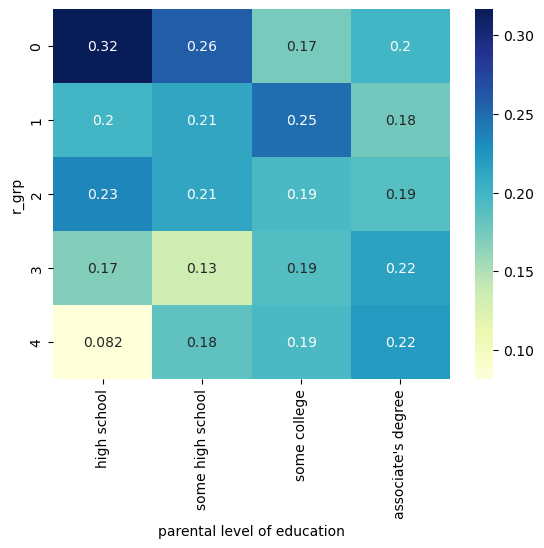

In [86]:
import seaborn as sns

tab = pd.crosstab(df_sp['r_grp'], df_sp['parental level of education'], normalize='columns')
tab = tab[['high school', 'some high school', 'some college',
           "associate's degree","bachelor's degree", "master's degree"]]
sns.heatmap(tab, cmap='YlGnBu', annot=True)




### 2.3. 날짜시간 변수 활용

날짜시간 변수에서 요소를 추출할 수 있고, 날짜시간별로 집계된 데이터로 시각화 가능

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [91]:
df_subway = pd.read_csv('data/서울교통공사_역별일별승하차인원정보_20220731.csv')
df_subway

,날짜,호선,역번호,역명,구분,이용객수
0,2022-01-01,1,150,서울역,승차,18525
1,2022-01-01,1,150,서울역,하차,17087
2,2022-01-01,1,151,시청,승차,5660
3,2022-01-01,1,151,시청,하차,5063
4,2022-01-01,1,152,종각,승차,10046
...,...,...,...,...,...,...
115601,2022-07-31,8,2826,수진,하차,2579
115602,2022-07-31,8,2827,모란,승차,2320
115603,2022-07-31,8,2827,모란,하차,2037
115604,2022-07-31,8,2828,남위례,승차,2126


In [93]:
# to_datetime()을 활용한 형식 변환
df_subway['호선'] = df_subway['호선'].astype('category')
df_subway['날짜'] = pd.to_datetime(df_subway['날짜'])
df_subway.dtypes

날짜      datetime64[ns]
호선            category
역번호              int64
역명              object
구분              object
이용객수             int64
dtype: object

In [94]:
# 요일 변수 생성
df_subway['요일'] = df_subway['날짜'].dt.weekday
df_subway

,날짜,호선,역번호,역명,구분,이용객수,요일
0,2022-01-01,1,150,서울역,승차,18525,5
1,2022-01-01,1,150,서울역,하차,17087,5
2,2022-01-01,1,151,시청,승차,5660,5
3,2022-01-01,1,151,시청,하차,5063,5
4,2022-01-01,1,152,종각,승차,10046,5
...,...,...,...,...,...,...,...
115601,2022-07-31,8,2826,수진,하차,2579,6
115602,2022-07-31,8,2827,모란,승차,2320,6
115603,2022-07-31,8,2827,모란,하차,2037,6
115604,2022-07-31,8,2828,남위례,승차,2126,6


In [95]:
# 월 변수 생성
df_subway['월'] = df_subway['날짜'].dt.month
df_subway

,날짜,호선,역번호,역명,구분,이용객수,요일,월
0,2022-01-01,1,150,서울역,승차,18525,5,1
1,2022-01-01,1,150,서울역,하차,17087,5,1
2,2022-01-01,1,151,시청,승차,5660,5,1
3,2022-01-01,1,151,시청,하차,5063,5,1
4,2022-01-01,1,152,종각,승차,10046,5,1
...,...,...,...,...,...,...,...,...
115601,2022-07-31,8,2826,수진,하차,2579,6,7
115602,2022-07-31,8,2827,모란,승차,2320,6,7
115603,2022-07-31,8,2827,모란,하차,2037,6,7
115604,2022-07-31,8,2828,남위례,승차,2126,6,7


In [96]:
# 날짜별 집계값의 생성
agg = df_subway.groupby(['날짜','호선'], as_index=False)['이용객수'].sum()
agg

,날짜,호선,이용객수
0,2022-01-01,1,173736
1,2022-01-01,2,975559
2,2022-01-01,3,356262
3,2022-01-01,4,386622
4,2022-01-01,5,461184
...,...,...,...
1691,2022-07-31,4,492378
1692,2022-07-31,5,554841
1693,2022-07-31,6,327457
1694,2022-07-31,7,496649


<AxesSubplot:xlabel='날짜', ylabel='이용객수'>

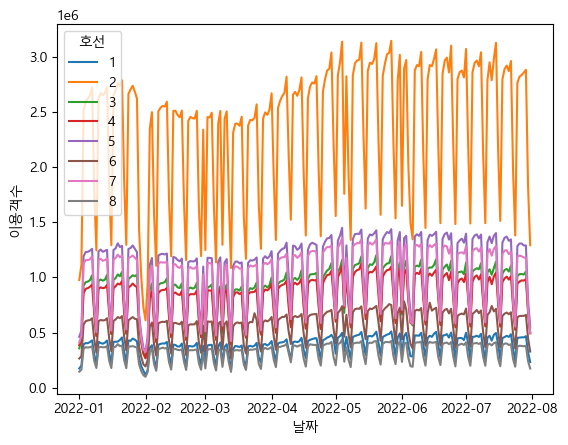

In [97]:
# 시계열 데이터의 시각화 
sns.lineplot(data=agg, 
             x='날짜',
             y='이용객수',
             hue='호선')

#### [실습] df_accident를 활용하여 7, 8월 새벽 1~5시 사고 건수 계산

In [98]:
df_accident = pd.read_csv('data/도로교통공단_사망 교통사고 정보_20211231_utf8.csv')
df_accident

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X(UTMK),발생위치Y(UTMK),경도,위도
0,2021,2021-01-01 03:00,야,금,1,3,0,3,0,경북,...,추돌,안전운전 의무 불이행,교차로,교차로부근,승용차,승용차,1097010.0,1793385.0,128.578152,36.132653
1,2021,2021-01-01 09:00,주,금,1,0,0,0,0,충남,...,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,902369.0,1847109.0,126.408201,36.616845
2,2021,2021-01-01 15:00,주,금,1,0,0,0,0,강원,...,측면충돌,안전운전 의무 불이행,교차로,교차로내,원동기장치자전거,승용차,1123975.0,1974509.0,128.907484,37.761842
3,2021,2021-01-01 19:00,야,금,1,0,0,0,0,전남,...,횡단중,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,886507.0,1613961.0,126.263573,34.513391
4,2021,2021-01-01 21:00,야,금,1,0,0,0,0,경기,...,기타,기타,단일로,기타단일로,승용차,보행자,953522.0,1915403.0,126.976011,37.236327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,2021,2021-12-31 16:00,주,금,1,0,0,0,0,경북,...,정면충돌,안전운전 의무 불이행,교차로,교차로내,승용차,이륜차,1119020.0,1766895.0,128.818730,35.891434
2812,2021,2021-12-31 17:00,주,금,1,0,0,0,0,제주,...,추돌,안전운전 의무 불이행,단일로,기타단일로,화물차,화물차,940588.0,1503049.6,126.860248,33.517699
2813,2021,2021-12-31 18:00,야,금,1,0,0,0,0,강원,...,횡단중,보행자 보호의무 위반,단일로,기타단일로,승용차,보행자,1023127.0,1982332.0,127.762845,37.840465
2814,2021,2021-12-31 19:00,야,금,1,0,0,0,0,경북,...,횡단중,보행자 보호의무 위반,교차로,교차로횡단보도내,승용차,보행자,1058805.0,1824755.0,128.155943,36.418521


In [102]:
df_accident['발생년월일시'] = pd.to_datetime(df_accident['발생년월일시'])
df_accident['월'] = df_accident['발생년월일시'].dt.month
df_accident['시'] = df_accident['발생년월일시'].dt.hour
df_accident

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X(UTMK),발생위치Y(UTMK),경도,위도,월,시
0,2021,2021-01-01 03:00:00,야,금,1,3,0,3,0,경북,...,교차로,교차로부근,승용차,승용차,1097010.0,1793385.0,128.578152,36.132653,1,3
1,2021,2021-01-01 09:00:00,주,금,1,0,0,0,0,충남,...,단일로,기타단일로,승용차,없음,902369.0,1847109.0,126.408201,36.616845,1,9
2,2021,2021-01-01 15:00:00,주,금,1,0,0,0,0,강원,...,교차로,교차로내,원동기장치자전거,승용차,1123975.0,1974509.0,128.907484,37.761842,1,15
3,2021,2021-01-01 19:00:00,야,금,1,0,0,0,0,전남,...,단일로,기타단일로,화물차,보행자,886507.0,1613961.0,126.263573,34.513391,1,19
4,2021,2021-01-01 21:00:00,야,금,1,0,0,0,0,경기,...,단일로,기타단일로,승용차,보행자,953522.0,1915403.0,126.976011,37.236327,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,2021,2021-12-31 16:00:00,주,금,1,0,0,0,0,경북,...,교차로,교차로내,승용차,이륜차,1119020.0,1766895.0,128.818730,35.891434,12,16
2812,2021,2021-12-31 17:00:00,주,금,1,0,0,0,0,제주,...,단일로,기타단일로,화물차,화물차,940588.0,1503049.6,126.860248,33.517699,12,17
2813,2021,2021-12-31 18:00:00,야,금,1,0,0,0,0,강원,...,단일로,기타단일로,승용차,보행자,1023127.0,1982332.0,127.762845,37.840465,12,18
2814,2021,2021-12-31 19:00:00,야,금,1,0,0,0,0,경북,...,교차로,교차로횡단보도내,승용차,보행자,1058805.0,1824755.0,128.155943,36.418521,12,19


In [105]:
cond_month = df_accident['월'].between(7,8)
cond_hour= df_accident['시'].between(1,5)
df_accident[ cond_month & cond_hour  ].shape[0]

74

In [111]:
tab = df_accident.pivot_table(index="월", columns="시", values="사망자수", aggfunc='sum')
#tab.loc[7:8, 1:5].sum().sum()

<AxesSubplot:xlabel='시', ylabel='월'>

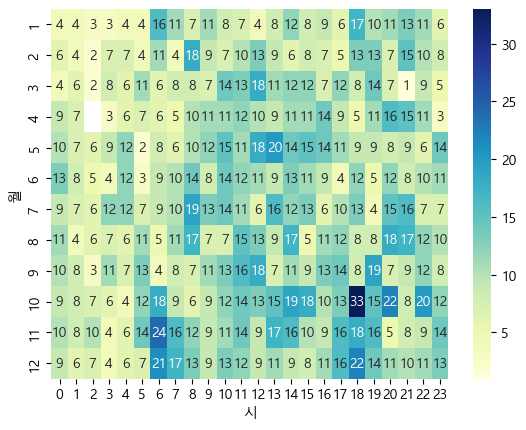

In [112]:
sns.heatmap(tab, cmap="YlGnBu", annot=True)

In [113]:
df_accident.columns

Index(['발생년', '발생년월일시', '주야', '요일', '사망자수', '부상자수', '중상자수', '경상자수', '부상신고자수',
       '발생지시도', '발생지시군구', '사고유형_대분류', '사고유형_중분류', '사고유형', '가해자법규위반',
       '도로형태_대분류', '도로형태', '가해자_당사자종별', '피해자_당사자종별', '발생위치X(UTMK)',
       '발생위치Y(UTMK)', '경도', '위도', '월', '시'],
      dtype='object')

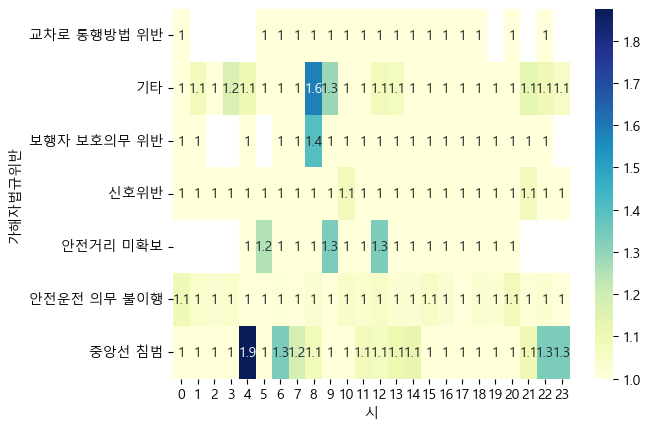

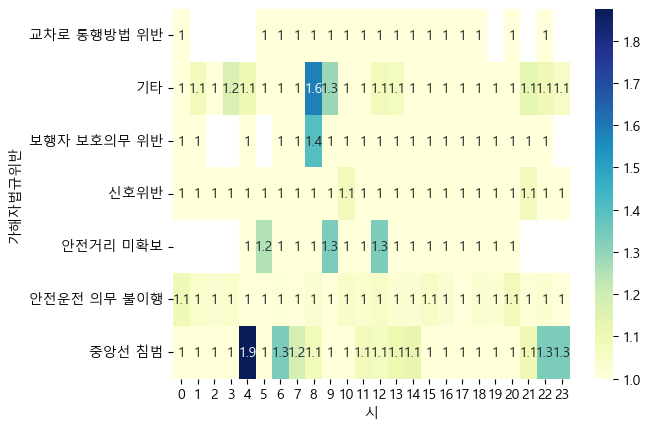

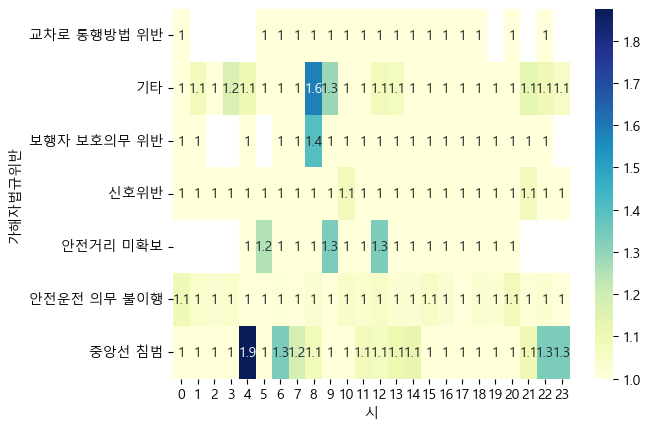

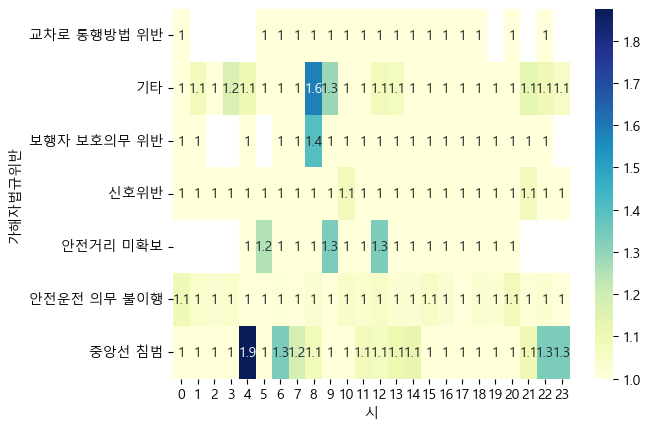

In [117]:
for col in ['사망자수', '부상자수', '중상자수', '경상자수']:
    tab = df_accident.pivot_table(index="가해자법규위반", columns="시", values="사망자수", aggfunc='mean')
    sns.heatmap(tab, cmap="YlGnBu", annot=True)
    plt.show()

In [115]:
df_accident["가해자법규위반"].unique()

array(['안전운전 의무 불이행', '기타', '신호위반', '교차로 통행방법 위반', '중앙선 침범',
       '보행자 보호의무 위반', '안전거리 미확보'], dtype=object)

#### End of script